In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
N = 2

# define image files
files = sorted(glob.glob('images/*jpeg'))[:N]

In [3]:
# read image files
ims = [cv2.imread(f) for f in files]

In [4]:
# convert to gray-scale
grays = [cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) for im in ims]

In [5]:
# identify feature points
pts = [cv2.goodFeaturesToTrack(g, 200, 0.01, 200) for g in grays]

In [6]:
'''# mark points for display
for n in range(N):
    pts_ = np.int0(pts[n])
    for pt in pts_:
        x, y = pt.ravel()
        cv2.circle(ims[n], (x, y), 30, (0, 0, 255), -1)

fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].imshow(ims[0][:, :, ::-1])
ax[1].imshow(ims[1][:, :, ::-1])

plt.show()'''
print('')

In [7]:
curr_pts, status, err = cv2.calcOpticalFlowPyrLK(grays[0], grays[1], pts[0], None)

In [8]:
for i, pt in enumerate(np.int0(pts[0])):
    x, y = pt.ravel()
    if status[i, 0] == 1:
        cv2.circle(ims[0], (x, y), 20, (0, 255, 0), -1)
    else:
        cv2.circle(ims[0], (x, y), 20, (0, 0, 255), -1)

for i, pt in enumerate(np.int0(curr_pts)):
    x, y = pt.ravel()
    if status[i, 0] == 1:
        cv2.circle(ims[1], (x, y), 20, (0, 255, 0), -1)
    else:
        cv2.circle(ims[1], (x, y), 20, (0, 0, 255), -1)

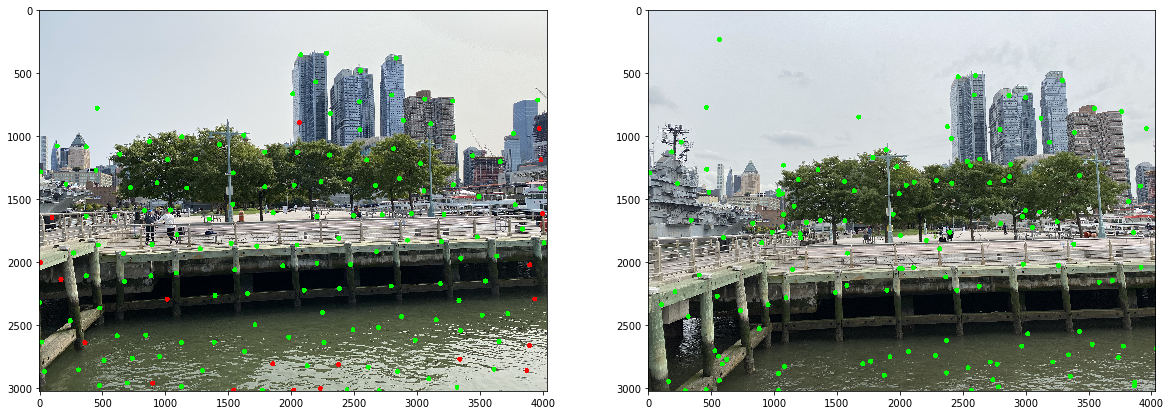

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].imshow(ims[0][:, :, ::-1])
ax[1].imshow(ims[1][:, :, ::-1])
plt.show()

In [10]:
len(pts[0]), len(curr_pts)

(159, 159)

In [ ]:
import cv2
import numpy as np

#filename = 'chessboard.jpg'
filename = files[0]
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

1.0


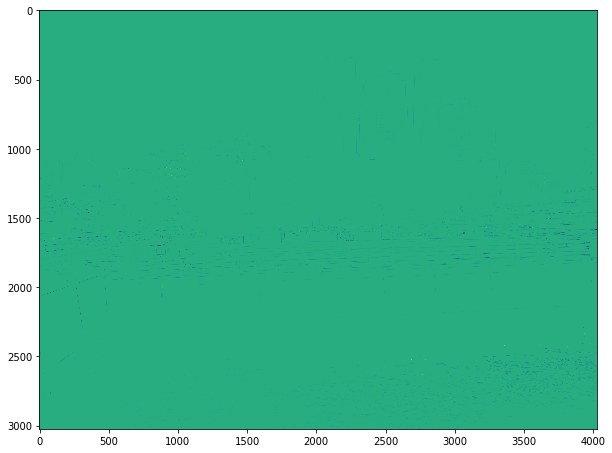

In [62]:
dst = cv2.cornerHarris(gray, 2, 5, 0.07)
dst -= (dst.min())
dst += 1
#dst = np.log(dst)
print(dst.min())

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dst)
plt.show()

(-20627180000.0, 12473061000.0)